In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data=pd.read_excel('iris.xls')
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
data.shape

(150, 5)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#Handling Null values :

In [10]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

<AxesSubplot:>

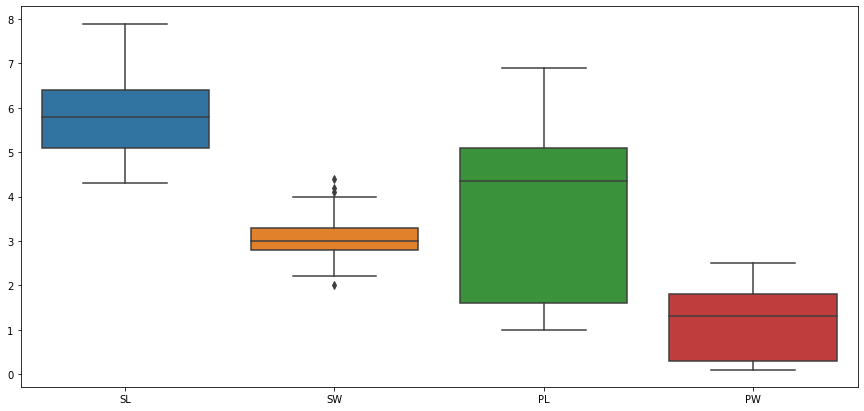

In [13]:
#Null values in SL,SW,PL
#Checking for ouliers before select a suitable method for filling NaN
plt.figure(figsize=(15,7))
sns.boxplot(data=data)

In [14]:
# As there are outlier in ne of the columns,using median to replace NaN

#Replacing using Median

for i in ['SL', 'SW', 'PL']:
    data[i]=data[i].fillna(data[i].median())

In [ ]:
#We can see both interpolate and median methods are filling the null values using almost similar data
#We filled our null values using median of each column


#Handling Outliers

<AxesSubplot:>

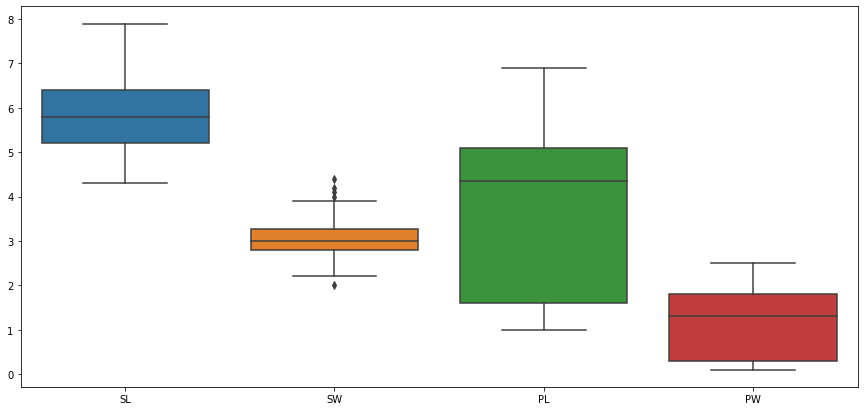

In [15]:
plt.figure(figsize=(15,7))
sns.boxplot(data=data)

In [16]:
#Outliers are present fro SW

Q1=data.SW.quantile(0.25,interpolation='midpoint')
Q3=data.SW.quantile(0.75,interpolation='midpoint')
Q1,Q3

(2.8, 3.25)

In [18]:
IQR=Q3-Q1
print("IQR",IQR)

LL=Q1-1.5*IQR 
UL=Q3+1.5*IQR 

print("Lower Limit",LL)
print("Upper Limit",UL)

IQR 0.4500000000000002
Lower Limit 2.1249999999999996
Upper Limit 3.9250000000000003


In [21]:
outliers=data[(data.SW<LL) | (data.SW>UL)] #These are the outliers in the SW column
outliers

,SL,SW,PL,PW,Classification
14,5.8,4.0,1.2,0.2,Iris-setosa
15,5.7,4.4,1.5,0.4,Iris-setosa
32,5.2,4.1,1.5,0.1,Iris-setosa
33,5.5,4.2,1.4,0.2,Iris-setosa
60,5.0,2.0,3.5,1.0,Iris-versicolor


In [22]:
#Capping and Flooring method with IQR
data['SW']= np.where(data['SW']>UL,UL,np.where(data['SW']<LL,LL,data['SW']))

In [23]:
data[(data.SW<LL) | (data.SW>UL)]

,SL,SW,PL,PW,Classification


plt.figure(figsize=(15,7))
sns.boxplot(data=data)

In [ ]:
#Duplicate Check

In [27]:
data.duplicated().sum()

3

In [28]:
data[data.duplicated()]

,SL,SW,PL,PW,Classification
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [29]:
#Dropping 34th,37th and 142nd rows
data.drop([34,37,142],inplace=True)

In [30]:
data.duplicated().sum()

0

In [32]:
data['Classification'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [33]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
data['Classification']= label_encoder.fit_transform(data['Classification'])
  
data['Classification'].unique()

array([0, 1, 2])

In [31]:
data.shape

(147, 5)

# Building Model

In [ ]:
#Spliting the data set

In [34]:
#First we can split our iris datset to X and y
X = data.drop(['Classification'],axis=1)
y = iris.Classification

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=34)

# 1.Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression
logic = LogisticRegression(max_iter=200)
logic.fit(X_train,y_train)
y_pred = logic.predict(X_test)

In [39]:
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix
print(accuracy_score(y_test,y_pred))
print(f1_score(y_test,y_pred,average='weighted'))
print(confusion_matrix(y_test,y_pred))

0.9666666666666667
0.9666240953597277
[[13  1  0]
 [ 0 14  0]
 [ 0  0  2]]


# 2.KNN

In [40]:
#inserting suitable k Value

from sklearn.neighbors import KNeighborsClassifier

accuracy = []
neighbors = np.arange(3,15)
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k, metric='minkowski')
    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_test)
    acc = accuracy_score(y_pred,y_test)
    accuracy.append(acc)
accuracy

[0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667]

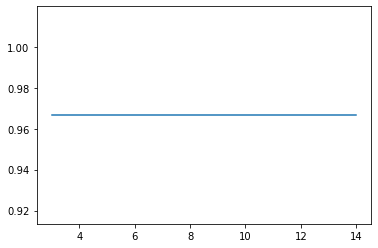

In [41]:
plt.plot(neighbors,accuracy)

In [42]:
#As the accuracy is high in all the possible values of k, we are chossing the mid point, i.e, 8

classifier = KNeighborsClassifier(n_neighbors=8, metric='minkowski')
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

In [43]:
print(accuracy_score(y_test,y_pred))
print(f1_score(y_test,y_pred,average='weighted'))
print(confusion_matrix(y_test,y_pred))

0.9666666666666667
0.9666240953597277
[[13  1  0]
 [ 0 14  0]
 [ 0  0  2]]


# 3.SVM

In [44]:
from sklearn.svm import SVC
svm = SVC(C=1,kernel='rbf')
svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)

In [45]:
print(accuracy_score(y_test,y_pred))
print(f1_score(y_test,y_pred,average='weighted'))
print(confusion_matrix(y_test,y_pred))

0.9666666666666667
0.9666240953597277
[[13  1  0]
 [ 0 14  0]
 [ 0  0  2]]


# 4.Decision Tree

In [46]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)
y_pred = tree.predict(X_test)

In [47]:
print(accuracy_score(y_test,y_pred))
print(f1_score(y_test,y_pred,average='weighted'))
print(confusion_matrix(y_test,y_pred))

1.0
1.0
[[14  0  0]
 [ 0 14  0]
 [ 0  0  2]]


Text(51.0, 0.5, 'Predcited Value')

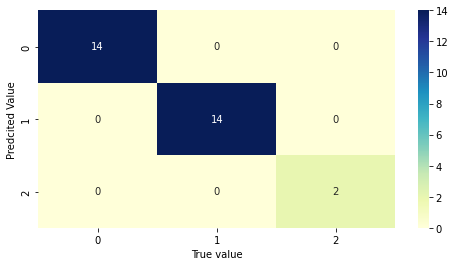

In [53]:
cm = (confusion_matrix(y_test,y_pred))
plt.figure(figsize=(8,4))
sns.heatmap(cm,annot=True,cmap="YlGnBu")
plt.xlabel("True value")
plt.ylabel("Predcited Value")

# Random Forest

In [49]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(X_train,y_train)
y_pred = forest.predict(X_test)

In [50]:
print(accuracy_score(y_test,y_pred))
print(f1_score(y_test,y_pred,average='weighted'))
print(confusion_matrix(y_test,y_pred))

1.0
1.0
[[14  0  0]
 [ 0 14  0]
 [ 0  0  2]]


Text(51.0, 0.5, 'Predcited Value')

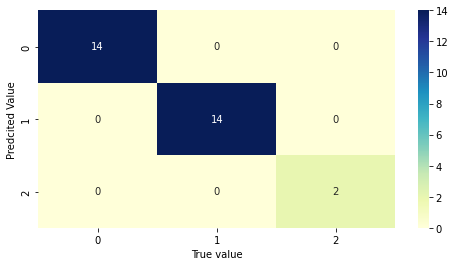

In [54]:
cm = (confusion_matrix(y_test,y_pred))
plt.figure(figsize=(8,4))
sns.heatmap(cm,annot=True,cmap="YlGnBu")
plt.xlabel("True value")
plt.ylabel("Predcited Value")

#Both the Decision Tree model and Random Forest Classifier gives 100 percentage accuracy and f1 score